In [2]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

In [3]:
%run ../../stochastic_fractal_m.py

In [4]:
alphap = 2
probp = 0.75

In [30]:
ensemble_size = 500*1
time_iteration = 1000*100
min_iteration = 1000*10

# number_of_points = 21

iteration_step = 5000

## Directories

In [31]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig  ="../../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../../data/temp/alpha{}/".format(alphap)
dir_fig  ="../../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")
    pass

### Filename
filename = "fractal_dim_alpha_{}_p_{}".format(alphap, int(probp*100))
out_data_filename = dir_data +filename
print(out_data_filename)

directory  ../../data/temp/alpha2/  exists
directory  ../../figures/temp/alpha2/  exists
../../data/temp/alpha2/fractal_dim_alpha_2_p_75


## Simulation

In [32]:
sf_numberlength = NumberLength(alpha=alphap, probability=probp)
sf_numberlength.log(True)

kwargs  {'alpha': 2, 'probability': 0.75}


In [33]:
data = sf_numberlength.run_ensemble(ensemble_size, time_iteration, min_iteration, iteration_step)

realization  5  . Time spent  0.6881058216094971  sec
realization  10  . Time spent  0.7006814479827881  sec
realization  15  . Time spent  0.6149511337280273  sec
realization  20  . Time spent  0.5908279418945312  sec
realization  25  . Time spent  0.71199631690979  sec
realization  30  . Time spent  0.7233133316040039  sec
realization  35  . Time spent  0.6424169540405273  sec
realization  40  . Time spent  0.6667888164520264  sec
realization  45  . Time spent  0.5864157676696777  sec
realization  50  . Time spent  0.6447803974151611  sec
realization  55  . Time spent  0.569324254989624  sec
realization  60  . Time spent  0.6820828914642334  sec
realization  65  . Time spent  0.6872384548187256  sec
realization  70  . Time spent  0.9070377349853516  sec
realization  75  . Time spent  0.6429474353790283  sec
realization  80  . Time spent  0.7119119167327881  sec
realization  85  . Time spent  0.9142167568206787  sec
realization  90  . Time spent  0.8135762214660645  sec
realization  9

estimated df(alpha, p)=  0.7768672286628188


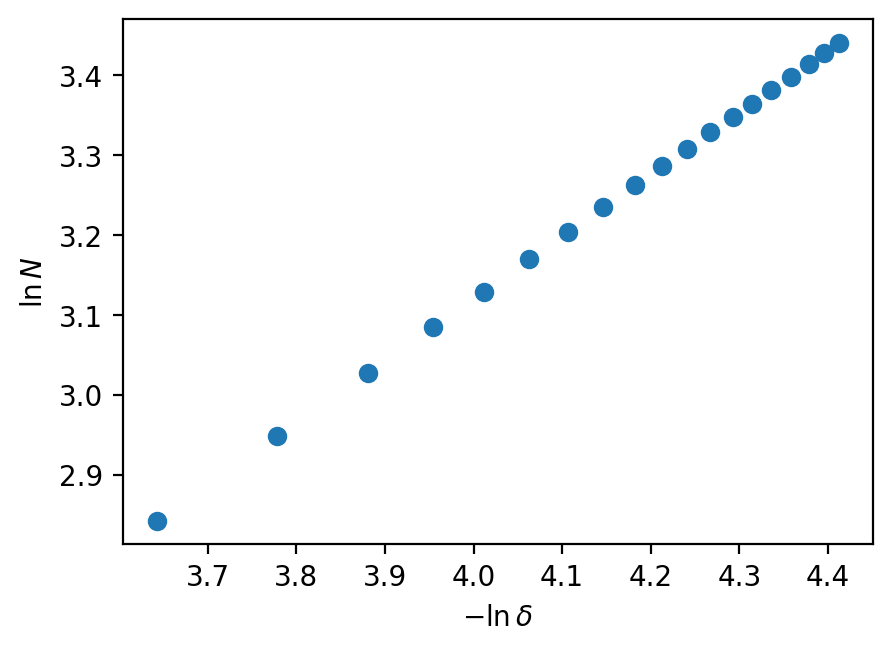

In [34]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 200)
N1_average, M1_average = data.T
N1_log = np.log(N1_average)
minus_delta1_log = N1_log - np.log(M1_average)
slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
print("estimated df(alpha, p)= ", slope)
plt.plot(minus_delta1_log, N1_log, "o")
plt.xlabel(r"$-\ln\,\delta$")
plt.ylabel(r"$\ln\,N$")
axes.set_position([0.15,0.15,0.75,0.75])

In [35]:
print("estimated   df = ", slope)
ana_soln = AnalyticSoln()
print("Theoritical df =", ana_soln.find_df(alphap, probp))

estimated   df =  0.7768672286628188
Theoritical df = 0.778719


In [36]:
N1_average

array([17.158, 19.064, 20.654, 21.866, 22.852, 23.796, 24.634, 25.396,
       26.108, 26.746, 27.322, 27.906, 28.448, 28.926, 29.408, 29.906,
       30.4  , 30.806, 31.194])

In [37]:
M1_average

array([0.44934026, 0.43572042, 0.42617483, 0.41919139, 0.4135607 ,
       0.40941224, 0.4053296 , 0.40192624, 0.39863899, 0.39597685,
       0.39304295, 0.39126082, 0.38866302, 0.38672961, 0.38491913,
       0.38295366, 0.38120247, 0.37967176, 0.37835596])

## Write data to file

In [38]:
header = dict()
header['alpha'] = alphap
header['probability'] = probp
header['ensemble_size']=ensemble_size
header['total_time_iteraion']=time_iteration
header['min_time_iteraion']=min_iteration
header['cols'] = ["t", "N", "M"]

time_col = np.arange(min_iteration, time_iteration+1, iteration_step)

header_str = json.dumps(header)
print(header_str)
print(out_data_filename)
# np.savetxt(out_data_filename, np.c_[time_col, N1_average, M1_average], header=header_str)

{"alpha": 2, "probability": 0.75, "ensemble_size": 500, "total_time_iteraion": 100000, "min_time_iteraion": 10000, "cols": ["t", "N", "M"]}
../../data/temp/alpha2/fractal_dim_alpha_2_p_75


### plot $-\ln \delta$ vs $\ln t$

In [39]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

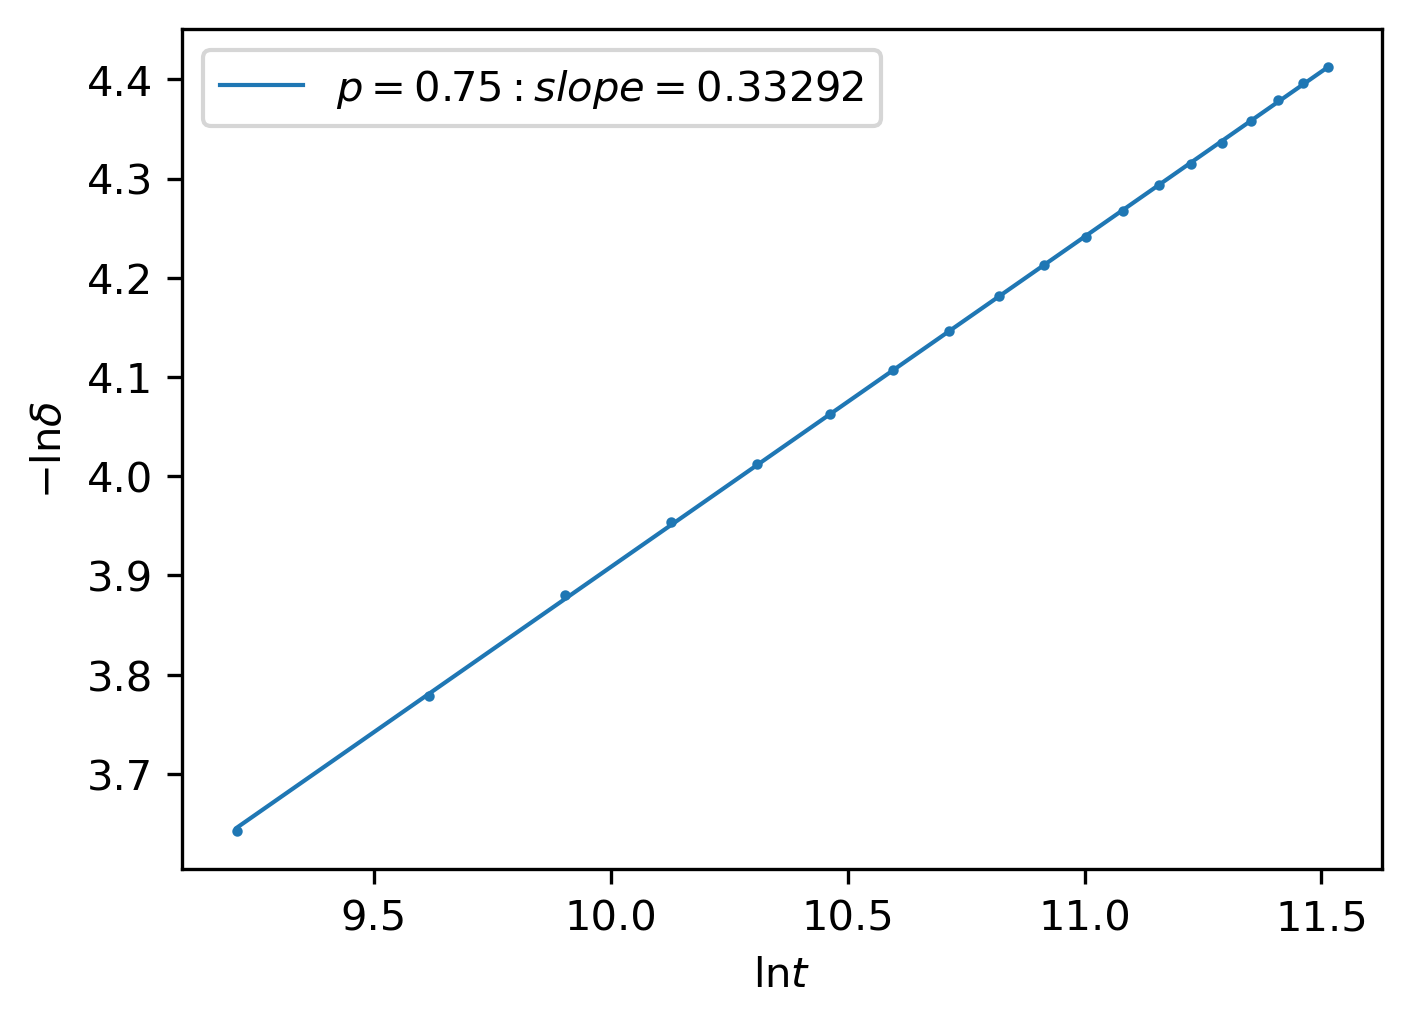

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
colors = ['tab:blue', 'tab:orange', 'tab:green']

i = 0

tt = np.arange(min_iteration, time_iteration+1, iteration_step)

t, N, M =tt, N1_average, M1_average
y, yyy, slope, intercept = convert_to_plot(N, M)
log_t = np.log(t)

regress = stats.linregress(log_t, y)
plt.plot(log_t, y, 'o', color=colors[i], markersize=1.5)
yyyyy = log_t*regress[0] + regress[1]
plt.plot(log_t, yyyyy, label=r"$p={:.2f}: slope={:.5f}$".format(probp, regress[0]),  color=colors[i], linewidth=1)
i += 1

# plt.legend(loc='best', bbox_to_anchor=(0.5, 0.05, 0.5, 0.5))
plt.legend(loc=2)
plt.ylabel(r"$-\ln \delta$")
plt.xlabel(r"$\ln t$")
# plt.ylim([0.5, 3])
ax.set_position([0.15, 0.15, 0.8, 0.8])
# print(fig_filename)
# plt.savefig(fig_filename